In [5]:
import cv2
import ultralytics
from matplotlib import pyplot as plt
import numpy as np
import easyocr
from ultralytics import YOLO

In [20]:
img = cv2.imread('image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


0: 192x640 1 plate, 34.0ms
Speed: 2.0ms preprocess, 34.0ms inference, 2.0ms postprocess per image at shape (1, 3, 192, 640)


DS


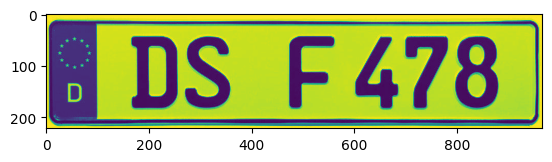

In [22]:
# Load a model
model = YOLO('best.pt')  # load a custom model
threshold = 0.5
results = model(img)[0]

for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > threshold:
        plt.imshow(cv2.rectangle(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cropped_image = gray[int(y1):int(y2), int(x1):int(x2)]
        plt.imshow(cropped_image)
        reader = easyocr.Reader(['en'])
        result = reader.readtext(cropped_image)
        print(result[0][1], result[1][1])
        print
        # print(result[1][1])


In [37]:
s = ''
for name in result:
    s += str(name[1])

print(s)

DSF478


In [29]:
result

[([[156, 29], [374, 29], [374, 194], [156, 194]], 'DS', 0.9966454125478291),
 ([[460, 24], [898, 24], [898, 204], [460, 204]], 'F478', 0.942741870880127)]